<a href="https://colab.research.google.com/github/FarhanHassan/PythonAssignment/blob/main/PS4GamesSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np

In [24]:
df=pd.read_csv('/content/drive/MyDrive/DataAnalyst/PS4_GamesSales.csv',encoding='ISO-8859-1')
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [25]:
df.shape

(1034, 9)

In [26]:
# Impute Year with the median
df['Year'] = df['Year'].fillna(df['Year'].median())

In [27]:
#Impute Publisher with 'Unknown'
df['Publisher'] = df['Publisher'].fillna('Unknown')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           1034 non-null   float64
 2   Genre          1034 non-null   object 
 3   Publisher      1034 non-null   object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [29]:
#1. Identify the top 5 best-selling games globally.
df.nlargest(5, 'Global')['Game']



,Game
0,Grand Theft Auto V
1,Call of Duty: Black Ops 3
2,Red Dead Redemption 2
3,Call of Duty: WWII
4,FIFA 18


In [30]:
#2. Compare regional sales (North America, Europe, Japan, and Rest of the World) for each genre to understand market preferences.
df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()


,North America,Europe,Japan,Rest of World
Genre,,,,
Action,48.15,57.53,10.27,20.76
Action-Adventure,22.30,27.79,1.96,9.83
Adventure,5.27,6.08,1.64,2.23
Fighting,8.58,6.19,1.67,2.98
MMO,1.32,1.45,0.20,0.55
Misc,3.64,6.03,0.96,1.85
Music,2.40,1.62,0.17,0.84
Party,0.09,0.47,0.00,0.10
Platform,5.48,8.92,0.67,2.77


In [31]:
#3. Find the publisher with the highest total global sales.
top_publisher = df.groupby('Publisher')['Global'].sum().idxmax()
total_sales = df.groupby('Publisher')['Global'].sum().max()
print(f"Top Publisher: {top_publisher}, Total Sales: {total_sales}")

Top Publisher: Activision, Total Sales: 72.44


In [33]:
#4. Analyze the year with the highest number of game releases.
games_by_year = df['Year'].value_counts()
year_with_most_releases = games_by_year.idxmax()
print(f"Year with Most Releases: {year_with_most_releases}, Total Releases: {games_by_year.max()}")

Year with Most Releases: 2016.0, Total Releases: 431


In [34]:
#5. Determine the most popular genre globally based on total sales.
genre_sales = df.groupby('Genre')['Global'].sum()
most_popular_genre = genre_sales.idxmax()
print(f"Most Popular Genre: {most_popular_genre}, Total Sales: {genre_sales.max()}")

Most Popular Genre: Action, Total Sales: 136.85


In [35]:
#6. Identify the game with the highest sales in Japan compared to other regions.
top_game_japan = df.loc[df['Japan'].idxmax()]
print(top_game_japan[['Game', 'Japan', 'North America', 'Europe', 'Rest of World']])

Game             Monster Hunter: World
Japan                             2.17
North America                     1.03
Europe                            1.06
Rest of World                     0.42
Name: 24, dtype: object


In [36]:
#7. Examine if there is a correlation between sales in North America and Europe.
correlation = df['North America'].corr(df['Europe'])
print(f"Correlation between North America and Europe Sales: {correlation}")

Correlation between North America and Europe Sales: 0.8159968279353849


In [37]:
#8. Compare the sales growth trend for "Action" and "Shooter" genres over the years.
filtered_data = df[df['Genre'].isin(['Action', 'Shooter'])]
sales_trend = filtered_data.groupby(['Year', 'Genre'])['Global'].sum().unstack()
print(sales_trend)

Genre   Action  Shooter
Year                   
2013.0    1.91    11.13
2014.0   31.97    21.38
2015.0   29.73    36.95
2016.0   25.92    34.34
2017.0   30.51    30.92
2018.0   16.81     0.27
2019.0    0.00     0.00
2020.0    0.00      NaN


In [38]:
#9. Identify the top publisher in terms of sales for each region.
top_publishers_by_region = {
    region: df.groupby('Publisher')[region].sum().idxmax()
    for region in ['North America', 'Europe', 'Japan', 'Rest of World']
}
print(top_publishers_by_region)

{'North America': 'Activision', 'Europe': 'Activision', 'Japan': 'Square Enix', 'Rest of World': 'Activision'}


In [39]:
#10.Visualize the distribution of global sales to identify patterns and outliers.
global_sales_distribution = df['Global'].describe()
print(global_sales_distribution)

count    1034.000000
mean        0.576054
std         1.583534
min         0.000000
25%         0.000000
50%         0.060000
75%         0.357500
max        19.390000
Name: Global, dtype: float64


# 11. Create visualizations to better understand and communicate data insights:

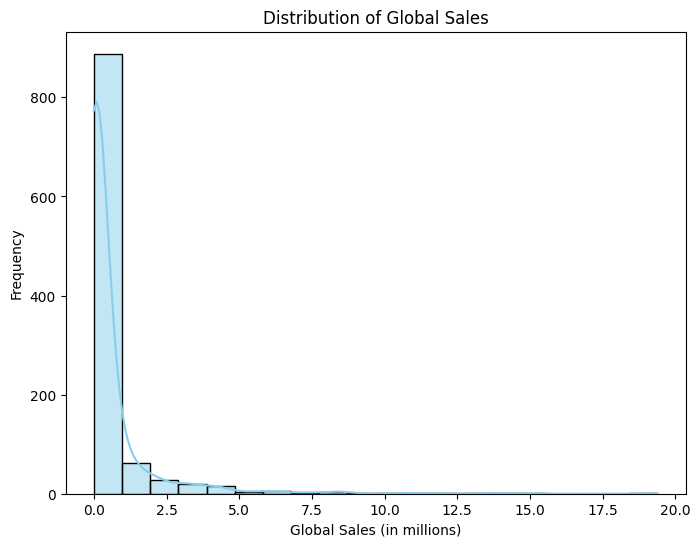

In [42]:
#Distribution of global sales (histogram).
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Global'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

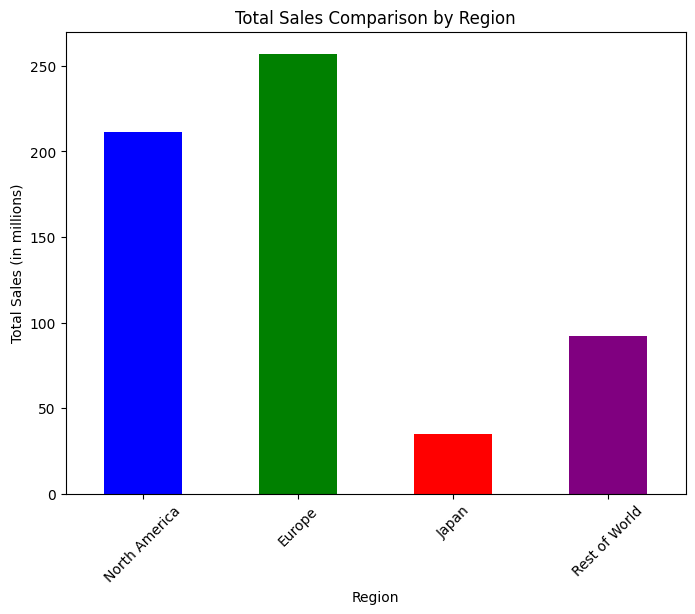

In [44]:
#Total sales comparison for regions (bar chart).

region_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Total Sales Comparison by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

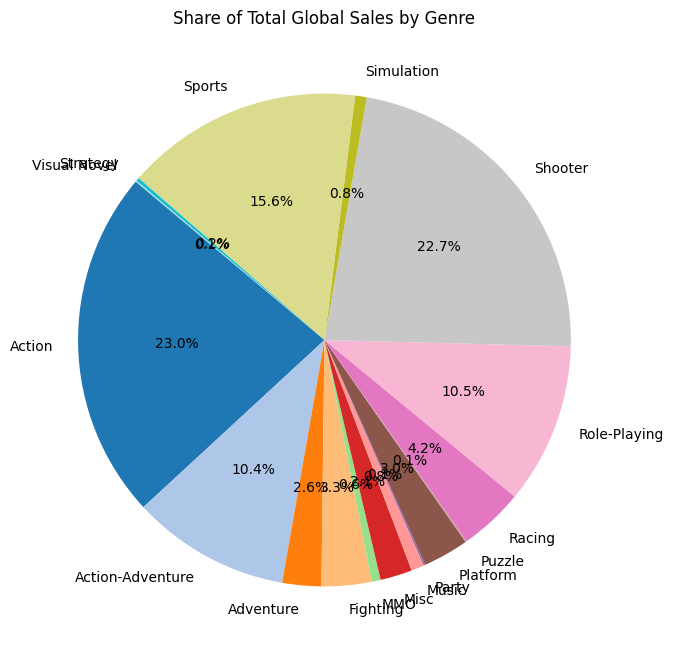

In [46]:
#Share of total global sales by genre (pie chart).
genre_sales = df.groupby('Genre')['Global'].sum()

plt.figure(figsize=(8, 8))
genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Share of Total Global Sales by Genre')
plt.ylabel('')
plt.show()


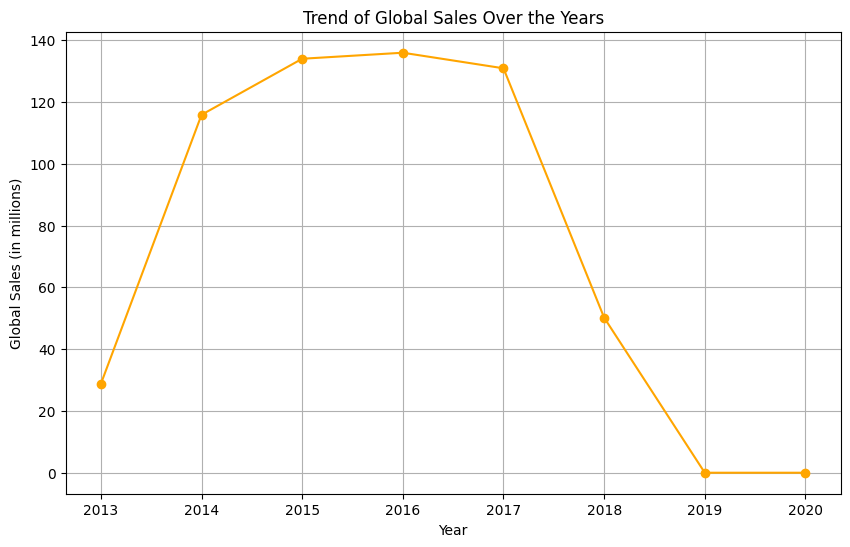

In [48]:
#Trend of global sales over the years (line chart).
sales_by_year = df.groupby('Year')['Global'].sum()

plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Trend of Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

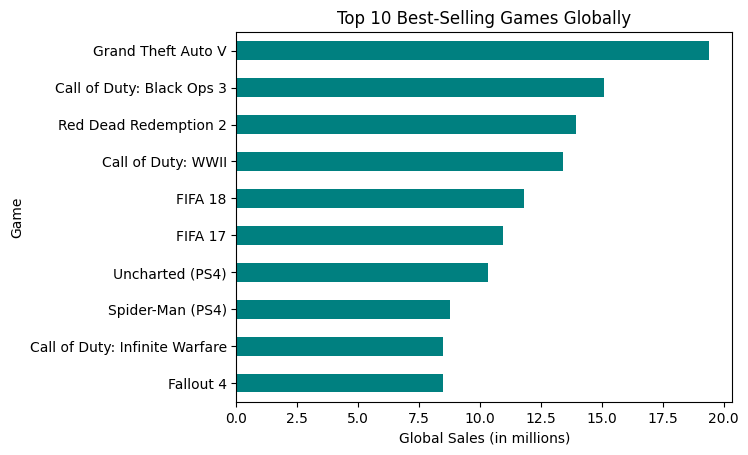

In [51]:
#Top 10 best-selling games globally (horizontal bar chart).
top_10_games = df.sort_values(by='Global', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_games.plot(kind='barh', x='Game', y='Global', color='teal', legend=False)
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game')
plt.gca().invert_yaxis()  # Invert the y-axis for descending order
plt.show()


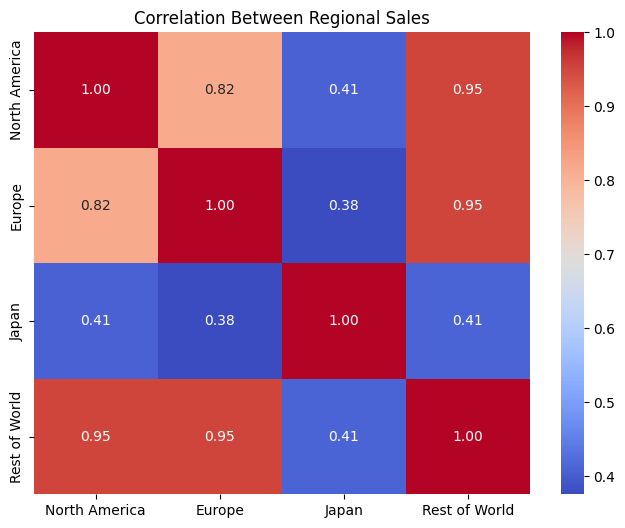

In [53]:
# Correlation between regional sales (heatmap).
correlation = df[['North America', 'Europe', 'Japan', 'Rest of World']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Regional Sales')
plt.show()


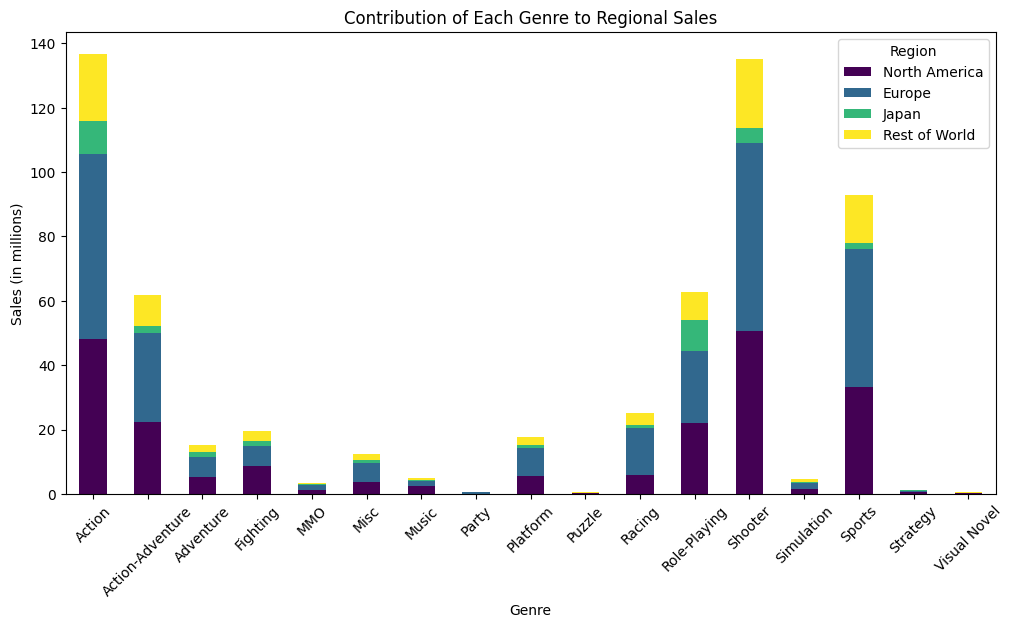

In [55]:
#Contribution of each genre to regional sales (stacked bar chart).
regional_genre_sales = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

regional_genre_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Contribution of Each Genre to Regional Sales')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

# What Did You Learn from Analyzing the Data?

1. What insights or patterns did you discover during your analysis?


Top-selling games significantly impacted global sales, regional preferences for genres varied (e.g., Sports in Europe, Shooter in NA), and Rockstar Games dominated the industry.




2. Did anything in the data surprise you? If yes, what was it?


Low sales of globally successful games in Japan highlighted cultural differences, and the underperformance of the "Rest of World" region indicated untapped market potential.

3. What challenges did you face, and how did you overcome them?:

Handling missing data and aggregating regional trends were challenging but resolved using imputation, grouping, and visualization techniques.

4. How do you think data analysis can help in making real-world decisions?

Data analysis supports targeted marketing, product development, and revenue forecasting while revealing market-specific trends and opportunities.



5. What skills or knowledge do you feel you have improved during this project?"

Skills Improved:
Enhanced data cleaning, visualization, and critical thinking skills, along with better storytelling and insights communication.